In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/survey_data.csv')
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
print("no_of_rows:-", data.shape[0])
print("no_of_cols:-", data.shape[1])

no_of_rows:- 830
no_of_cols:- 114


In [ ]:
data.dtypes

,0
ResponseId,int64
MainBranch,object
Age,object
Employment,object
RemoteWork,object
...,...
JobSatPoints_11,float64
SurveyLength,object
SurveyEase,object
ConvertedCompYearly,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 739.3+ KB


In [ ]:
data.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [ ]:
data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [ ]:
age_mapping = {
    'Under 18 years old': 17,         # Assuming 17 for 'Under 18'
    '18-24 years old': 21,           # Midpoint of 18-24
    '25-34 years old': 29.5,         # Midpoint of 25-34
    '35-44 years old': 39.5,         # Midpoint of 35-44
    '45-54 years old': 49.5,         # Midpoint of 45-54
    '55-64 years old': 59.5,         # Midpoint of 55-64
    '65 years or older': 70,         # Assuming 70 as a representative age
    'Prefer not to say': np.nan      # Exclude 'Prefer not to say'
}
data['Age_Numeric'] = data['Age'].map(age_mapping)
mean_age = data['Age_Numeric'].mean()
print(f"The mean age is: {mean_age}")

The mean age is: 35.550364077669904


In [ ]:
data.sample()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_Numeric
564,565,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Stack Over...,...,15.0,13.0,10.0,10.0,10.0,Appropriate in length,Neither easy nor difficult,16532.0,8.0,39.5


In [ ]:
data['Country'].nunique()

86

In [ ]:
data['Country'].value_counts()

,count
Country,
United States of America,196
United Kingdom of Great Britain and Northern Ireland,80
Germany,65
India,49
France,37
...,...
Liechtenstein,1
Nigeria,1
Slovakia,1


In [ ]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

In [ ]:
same_values = duplicates.groupby(list(data.columns)).size().reset_index()
print(same_values)

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

<ipython-input-34-664900c37e18>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  same_values = duplicates.groupby(list(data.columns)).size().reset_index()
<ipython-input-34-664900c37e18>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  same_values = duplicates.groupby(list(data.columns)).size().reset_index()
<ipython-input-34-664900c37e18>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

In [ ]:
num_duplicates = data.duplicated().sum()
print(f"no_of_duplicated_rows:{num_duplicates}")

no_of_duplicated_rows:0


In [ ]:
selected_cols = ['MainBranch','Employment','RemoteWork','Country']
duplicates = data[data.duplicated(subset=selected_cols, keep=False)]

In [ ]:
identical_cols = {}
for col in data.columns:
  identical_cols[col] = (duplicates[col].nunique == 1)
analysis = pd.DataFrame(list(identical_cols.items()), columns=['Column','identical'])
print('duplicated_rows')
print(duplicates)
print('analysis')
print(analysis)

duplicated_rows
     ResponseId                                         MainBranch  \
0             1                     I am a developer by profession   
1             2                     I am a developer by profession   
2             3                     I am a developer by profession   
5             6                        I code primarily as a hobby   
6             7  I am not primarily a developer, but I write co...   
..          ...                                                ...   
823         824                     I am a developer by profession   
825         826                     I am a developer by profession   
827         828                     I am a developer by profession   
828         829                     I am a developer by profession   
829         830                     I am a developer by profession   

                    Age           Employment  \
0    Under 18 years old  Employed, full-time   
1       35-44 years old  Employed, full-time   

<ipython-input-44-07270b75fb12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country.index, y=country.values, palette='viridis')


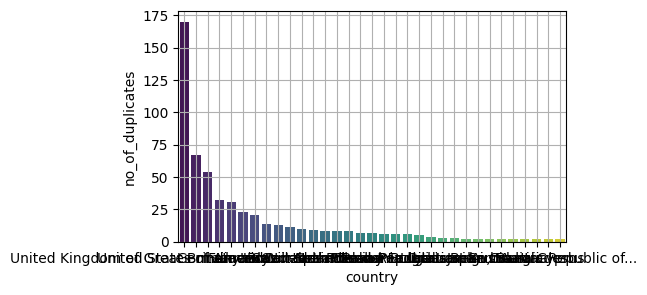

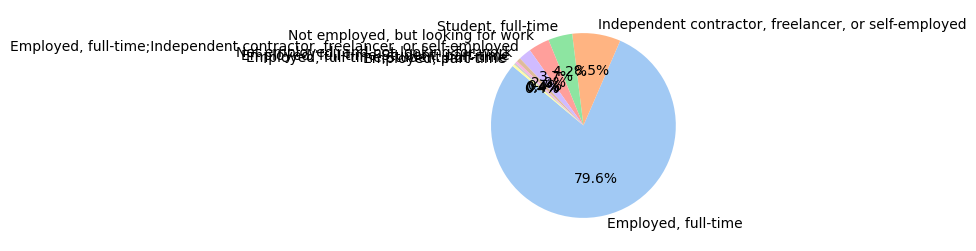

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
country = duplicates['Country'].value_counts()
employment = duplicates['Employment'] .value_counts()
plt.figure(figsize=(5,3))
sns.barplot(x=country.index, y=country.values, palette='viridis')
plt.xlabel('country')
plt.ylabel('no_of_duplicates')
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.pie(employment.values, labels=employment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.grid()
plt.show()

In [ ]:
data.drop_duplicates()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_Numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,826,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,41872.0,9.0,29.5
826,827,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,10.0,5.0,5.0,0.0,Appropriate in length,Easy,NaN,6.0,39.5
827,828,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Schoo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Books;Written Tutorial...,...,10.0,20.0,20.0,10.0,10.0,Appropriate in length,Neither easy nor difficult,3040.0,8.0,29.5
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0,39.5


In [ ]:
data.dropna()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_Numeric


In [ ]:
data.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,126
...,...
SurveyLength,15
SurveyEase,16
ConvertedCompYearly,588
JobSat,394


In [ ]:
data.drop_duplicates(subset=['RemoteWork','SurveyLength','SurveyEase','ConvertedCompYearly','JobSat','Age_Numeric'], inplace=True)

In [ ]:
data.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,35
...,...
SurveyLength,14
SurveyEase,15
ConvertedCompYearly,279
JobSat,174


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,35
...,...
SurveyLength,14
SurveyEase,15
ConvertedCompYearly,279
JobSat,174


In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.drop_duplicates(subset=['RemoteWork'], inplace=True)
data.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0
JobSat,0


In [ ]:
data.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0
JobSat,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0
JobSat,0


In [ ]:
data['RemoteWorkCategory'] = data['RemoteWork'].apply(
    lambda x:'Remote' if x == 'Yes' else
    'in - person' if x == 'No' else
    'Hybrid' if x == 'Maybe' else
    'NA'
)

In [ ]:
data[['RemoteWork','RemoteWorkCategory']]

,RemoteWork,RemoteWorkCategory
0,Remote,NA
3,0,NA
8,In-person,NA
12,"Hybrid (some remote, some in-person)",NA


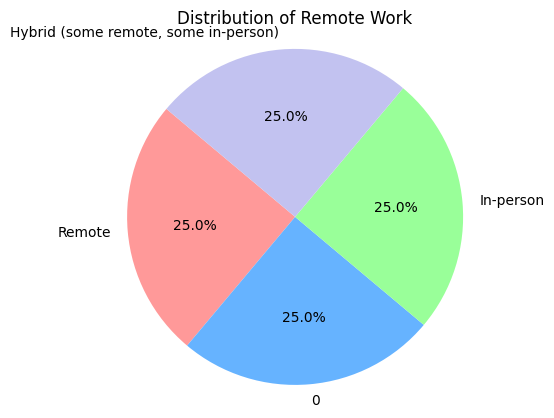

In [ ]:
remote = data['RemoteWork'].value_counts()
plt.pie(remote, labels=remote.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#c2c2f0'])
plt.axis('equal')
plt.title('Distribution of Remote Work')
plt.show()

In [ ]:
data['ConvertedCompYearly'].median()

0.0